## Association Rule Learning - Market Basket Optimization


A simple definition is "People who bought this product also bought this product".

##### Business Scenario:
A grocery store wants to do a promotion on some of its products, like buy 10 Apples and get a bag of grapes free but they need to know what products are associated with the other so they can determine the products that should be  discounts so they sell more goods. The owner collected weekly data of  different products bought by different customers in his store from the analysis which summed up to 7500 instances.

##### Goal of the Project:
Data analyst is to determine the products the customers are most likely going to buy together, so as to maximize the chance of a customer getting the deals/discounts.

## Import Libraries

In [45]:
! pip install apyori

  Stored in directory: C:\Users\Wale\AppData\Local\pip\Cache\wheels\5d\92\bb\474bbadbc8c0062b9eb168f69982a0443263f8ab1711a8cad0
Successfully built apyori


In [76]:
import os
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

from apyori import apriori

In [3]:
os.chdir('C:\\Users\\Wale\\Machine learning data')

In [16]:
data = pd.read_csv('Market_Basket_Optimisation.csv', header = None)

In [17]:
data

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
0,shrimp,almonds,avocado,vegetables mix,green grapes,whole weat flour,yams,cottage cheese,energy drink,tomato juice,low fat yogurt,green tea,honey,salad,mineral water,salmon,antioxydant juice,frozen smoothie,spinach,olive oil
1,burgers,meatballs,eggs,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,chutney,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,turkey,avocado,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,mineral water,milk,energy bar,whole wheat rice,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7496,butter,light mayo,fresh bread,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7497,burgers,frozen vegetables,eggs,french fries,magazines,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7498,chicken,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7499,escalope,green tea,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


## Exploratory Analysis

In [18]:
data.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19
count,7501,5747,4389,3345,2529,1864,1369,981,654,395,256,154,87,47,25,8,4,4,3,1
unique,115,117,115,114,110,106,102,98,88,80,66,50,43,28,19,8,3,3,3,1
top,mineral water,mineral water,mineral water,mineral water,green tea,french fries,green tea,green tea,green tea,green tea,low fat yogurt,green tea,green tea,green tea,magazines,salmon,frozen smoothie,protein bar,cereals,olive oil
freq,577,484,375,201,153,107,96,67,57,31,22,15,8,4,3,1,2,2,1,1


 Merely looking at the chart above we can see that Water has the most frequency in the data, next would be green tea and then french fries. We would visualize the data for better understanding.

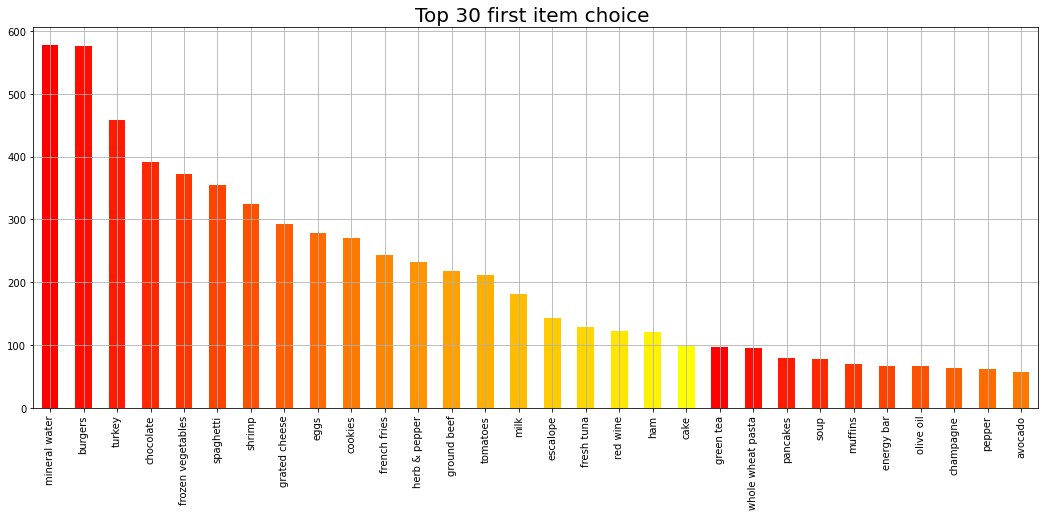

In [82]:
# Top 30 Most frequent first item
plt.figure(figsize= (18,7))
color = plt.cm.autumn(np.linspace(0,1,20))
data[0 ].value_counts().head(30).plot.bar(color=color)
plt.title('Top 30 first item choice ', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

I know the results from the table looks different from the results in the figure. What i plotted here is data from just the first column, indexed[0].
From this chart we can see the top first choice items of the customers, which is water followed by burgers.

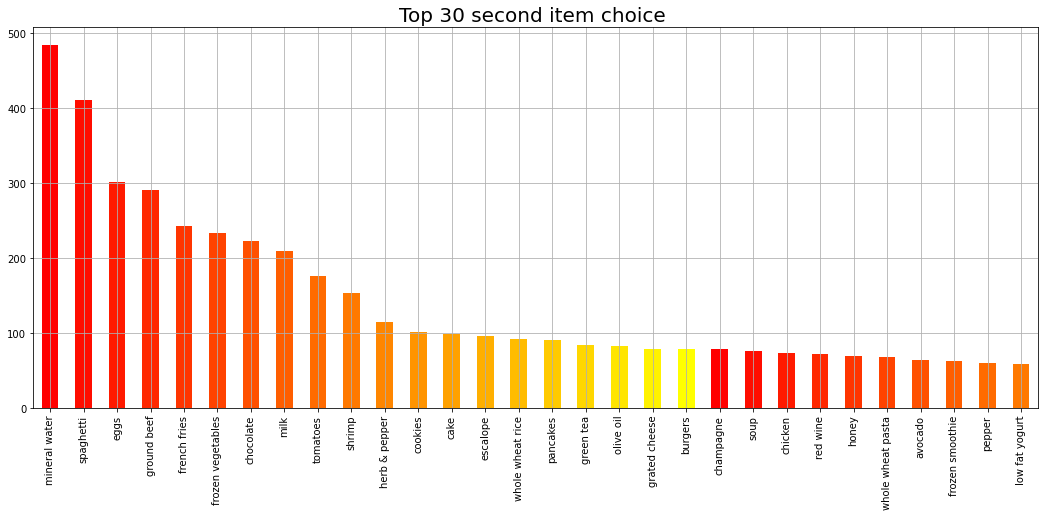

In [83]:
# Top 30 Most frequently second item
plt.figure(figsize= (18,7))
color = plt.cm.autumn(np.linspace(0,1,20))
data[1].value_counts().head(30).plot.bar(color=color)
plt.title('Top 30 second item choice  ', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

From this chart we can see the top second choices items of the customers, which is water followed by spaghetti. 

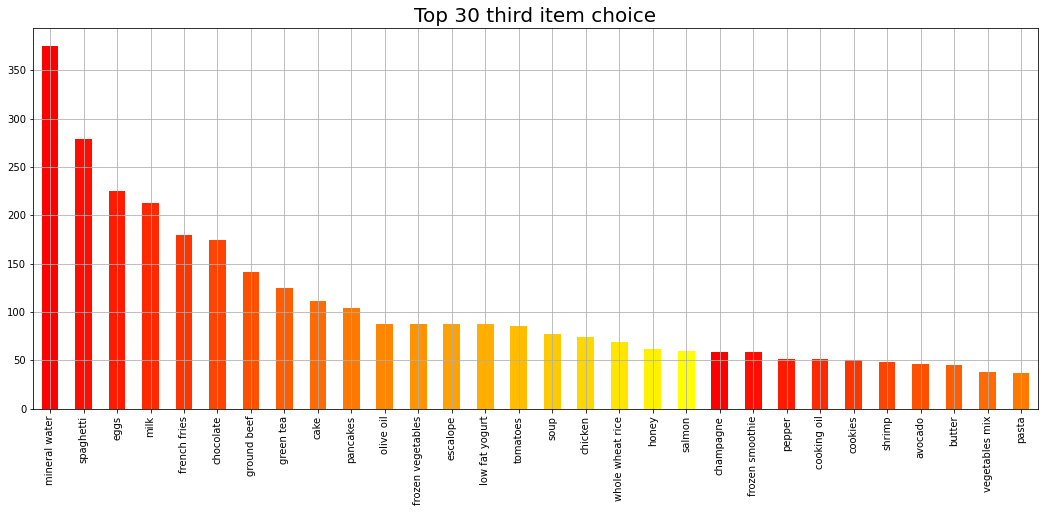

In [84]:
# Top 30 Most frequently second item
plt.figure(figsize= (18,7))
color = plt.cm.autumn(np.linspace(0,1,20))
data[2].value_counts().head(30).plot.bar(color=color)
plt.title('Top 30 third item choice', fontsize = 20)
plt.xticks(rotation = 90 )
plt.grid()
plt.show()

From this chart we can see the top third choices items of the customers, which is also water followed by spaghetti again. 

From these visualisations, inferences can be made about some items that are might appear in a customers basket like water, eggs, maybe spaghetti, but we cannot make conclusions now. We intend to learn much more from the data with the Apriori algorithm.

## Data Preprocessing

In [47]:
# convert the dataset into a list
transactions = []
for i in range(0, 7501):
    transactions.append([str(data.values[i,j])for j in range(0,20)])

In [75]:
# extract the unique values in the list so we know what products
# in total are in the dataset
def unique(transactions): 
    x = np.array(transactions) 
    print(np.unique(x)) 
      
  
list1 = transactions 
print("All the products sold in the store") 
unique(list1) 

All the products sold in the store
[' asparagus' 'almonds' 'antioxydant juice' 'asparagus' 'avocado'
 'babies food' 'bacon' 'barbecue sauce' 'black tea' 'blueberries'
 'body spray' 'bramble' 'brownies' 'bug spray' 'burger sauce' 'burgers'
 'butter' 'cake' 'candy bars' 'carrots' 'cauliflower' 'cereals'
 'champagne' 'chicken' 'chili' 'chocolate' 'chocolate bread' 'chutney'
 'cider' 'clothes accessories' 'cookies' 'cooking oil' 'corn'
 'cottage cheese' 'cream' 'dessert wine' 'eggplant' 'eggs' 'energy bar'
 'energy drink' 'escalope' 'extra dark chocolate' 'flax seed'
 'french fries' 'french wine' 'fresh bread' 'fresh tuna' 'fromage blanc'
 'frozen smoothie' 'frozen vegetables' 'gluten free bar' 'grated cheese'
 'green beans' 'green grapes' 'green tea' 'ground beef' 'gums' 'ham'
 'hand protein bar' 'herb & pepper' 'honey' 'hot dogs' 'ketchup'
 'light cream' 'light mayo' 'low fat yogurt' 'magazines' 'mashed potato'
 'mayonnaise' 'meatballs' 'melons' 'milk' 'mineral water' 'mint'
 'mint green

## Training the Apriori model on the dataset

In [79]:
rules = apriori(transactions = transactions, min_support=0.003,
                min_confidence =0.2, min_lift=3,
               min_lenght =2, max_length=2)

## Visualizing the results

In [81]:
# displaying all the rules
results = list(rules)
results

[RelationRecord(items=frozenset({'light cream', 'chicken'}), support=0.004532728969470737, ordered_statistics=[OrderedStatistic(items_base=frozenset({'light cream'}), items_add=frozenset({'chicken'}), confidence=0.29059829059829057, lift=4.84395061728395)]),
 RelationRecord(items=frozenset({'escalope', 'mushroom cream sauce'}), support=0.005732568990801226, ordered_statistics=[OrderedStatistic(items_base=frozenset({'mushroom cream sauce'}), items_add=frozenset({'escalope'}), confidence=0.3006993006993007, lift=3.790832696715049)]),
 RelationRecord(items=frozenset({'escalope', 'pasta'}), support=0.005865884548726837, ordered_statistics=[OrderedStatistic(items_base=frozenset({'pasta'}), items_add=frozenset({'escalope'}), confidence=0.3728813559322034, lift=4.700811850163794)]),
 RelationRecord(items=frozenset({'fromage blanc', 'honey'}), support=0.003332888948140248, ordered_statistics=[OrderedStatistic(items_base=frozenset({'fromage blanc'}), items_add=frozenset({'honey'}), confidence=0

In [85]:
## putting the result into a pandas dataframe
def inspect(results):
    lhs         = [tuple(result[2][0][0])[0] for result in results]
    rhs         = [tuple(result[2][0][1])[0] for result in results]
    supports    = [result[1] for result in results]
    confidences = [result[2][0][2] for result in results]
    lifts       = [result[2][0][3] for result in results]
    return list(zip(lhs, rhs, supports, confidences, lifts))
resultsinDataFrame = pd.DataFrame(inspect(results), columns = ['Left Hand Side', 'Right Hand Side', 'Support', 'Confidence', 'Lift'])

In [87]:
resultsinDataFrame.nlargest(10, columns = 'Lift')

,Left Hand Side,Right Hand Side,Support,Confidence,Lift
3,fromage blanc,honey,0.003333,0.245098,5.164271
0,light cream,chicken,0.004533,0.290598,4.843951
2,pasta,escalope,0.005866,0.372881,4.700812
8,pasta,shrimp,0.005066,0.322034,4.506672
7,whole wheat pasta,olive oil,0.007999,0.271493,4.122410
5,tomato sauce,ground beef,0.005333,0.377358,3.840659
1,mushroom cream sauce,escalope,0.005733,0.300699,3.790833
4,herb & pepper,ground beef,0.015998,0.323450,3.291994
6,light cream,olive oil,0.003200,0.205128,3.114710


#### Interpreting the rules
The apriori model found 9 rules:

1. There is a 29% confidence and a lift of 4.8 that Light cream and chicken are bought together. Light cream being the base item and chicken as the added/associated item.
2. There is a 30% confidence and a lift of 3.8 that escalope and mushroom cream sauce together. Mushroom cream being the base item and escalope as the added item.
3. There is a 37% confidence and a lift of 4.7 that escalope and pasta are bought together. Pasta being the base item and escalope as the added item.
4. There is a 24% confidence and a lift of 5.2 that fromage blanc and honey are bought together. Fromage blanc being the base item and honey as the added item.
5. There is a 32% confidence and a lift of 3.3 that ground beef and herb & pepper are bought together. Herb and pepper being the base item and ground beef as the added item.
6. There is a 38% confidence and a lift of 3.8 that ground beef and tomato sauce are bought together. Tomato sauce being the base item and ground beef as the added item.
7. There is a 20% confidence and a lift of 3.1 that olive oil and light cream are bought together. Light cream being the base item and olive oil as the added item.
8. There is a 27% confidence and a lift of 4.1 that olive oil and whole wheat pasta are bought together. Whole wheat pasta being the base item and olive oil as the added item.
9. There is a 32% confidence and a lift of 4.5 that shrimp and pasta are bought together. Pasta being the base item and shrimp as the added item.


The lift is the most import that metric in the model so the best rule is the combination of **fromage blanc and honey**.

##### What does this mean from the business owner?
The business owner can set up a promo on honey for every fromage blanc bought at the store. He could also do the same for light cream and chicken, so for each bottle of light cream bought the customer gets a discount on chicken or gets it free. The rate of the discount is up to the  business owner.

#### Note all the rules are suitable for the promo.